In [ ]:
//@version=5   
indicator("3-Minute Engulfing Pattern (3mEP) - 1m Visible", overlay=true, max_boxes_count=500, max_lines_count=500, max_labels_count=500)

// === Retrieve 3-minute candle data ===
[o3, h3, l3, c3, t3] = request.security(syminfo.tickerid, "3", [open, high, low, close, time])

// === Detect Bearish Engulfing (Bear-3mEP) ===
bear1 = c3[1] > o3[1]                      // 1st candle bullish
bear2 = c3 < o3                            // 2nd candle bearish
bearEngulf = bear1 and bear2 and c3 < o3[1] and o3 > c3[1]

// === Detect Bullish Engulfing (Bull-3mEP) ===
bull1 = c3[1] < o3[1]                      // 1st candle bearish
bull2 = c3 > o3                            // 2nd candle bullish
bullEngulf = bull1 and bull2 and c3 > o3[1] and o3 < c3[1]

// === Convert the 3-minute pattern to 1-minute bar timing ===
// If on lower timeframe (like 1-minute), we’ll find the first bar >= 3-minute candle time
patternTime = bearEngulf or bullEngulf ? t3 : na
patternTimePlot = request.security(syminfo.tickerid, "3", patternTime[0], lookahead=barmerge.lookahead_on)
patternOccurred = ta.change(patternTimePlot)

// === When a new 3m pattern occurs, find its matching 1m bar ===
if bearEngulf
    // find the first 1-minute bar matching that 3-minute candle time
    bi = ta.valuewhen(time >= t3, bar_index, 0)
    if not na(bi)
        // Draw rectangle for 1st candle’s body (from 3m data)
        box.new(left=bi,  right=bi + 6,  top=math.max(o3[1], c3[1]),  bottom=math.min(o3[1], c3[1]), bgcolor=color.new(#ceaf00, 55),  border_color=color.new(#ceaf00, 0))
        // Mid-body line
        mid_bear = (o3[1] + c3[1]) / 2
        line.new( x1=bi, y1=mid_bear, x2=bi + 6, y2=mid_bear, color=color.new(color.red, 0), style=line.style_dotted, width=1 )
        // Label
        label.new(bi, h3, "", style=label.style_circle, color=color.new(color.red, 0), textcolor=color.white)

if bullEngulf
    bi = ta.valuewhen(time >= t3, bar_index, 0)
    if not na(bi)
        box.new( left=bi,   right=bi + 6,  top=math.max(o3[1], c3[1]),  bottom=math.min(o3[1], c3[1]),  bgcolor=color.new(#ceaf00, 55),  border_color=color.new(#ceaf00, 0))
        mid_bull = (o3[1] + c3[1]) / 2
        line.new(x1=bi, y1=mid_bull,x2=bi + 6, y2=mid_bull,color=color.new(color.green, 0), style=line.style_dotted, width=1 )
        label.new(bi, l3, "", style=label.style_circle, color=color.new(color.green, 0), textcolor=color.white)


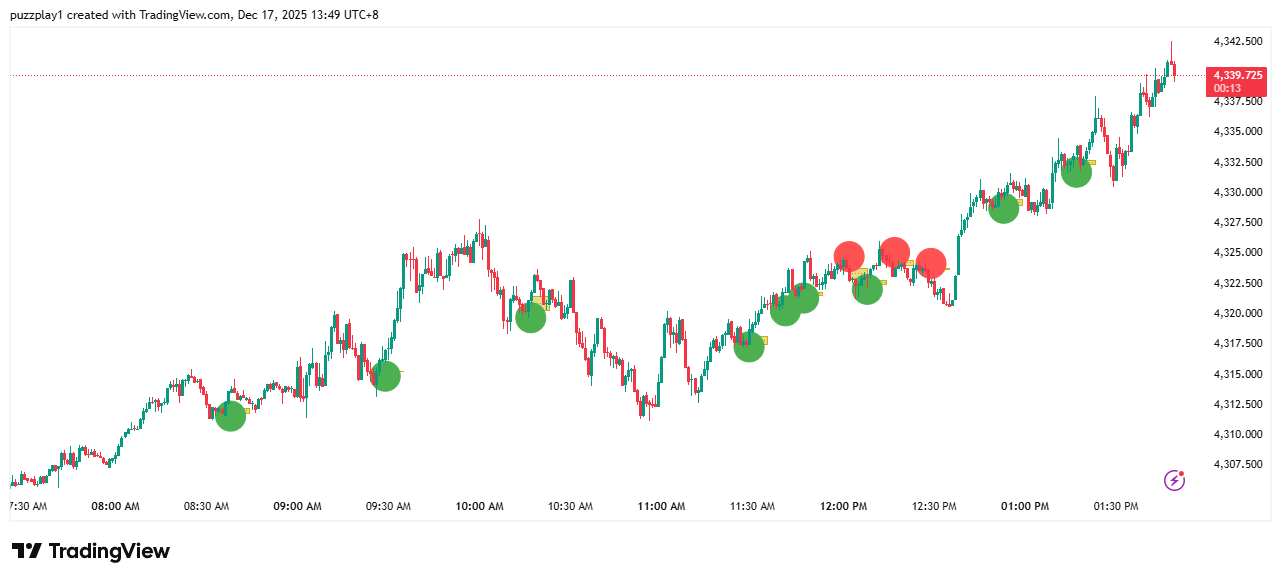